<a href="https://colab.research.google.com/github/teestar5/lesson00/blob/NeJron/%D0%94%D0%97_Lite_%D0%91%D0%B0%D0%B7%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B1%D0%BB%D0%BE%D0%BA_%7C_%D0%9E%D0%B1%D1%83%D1%87%D0%B0%D1%8E%D1%89%D0%B0%D1%8F%2C_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BE%D1%87%D0%BD%D0%B0%D1%8F_%D0%B8_%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B8_%D0%9F%D0%B5%D1%80%D0%B5%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5_%D0%9D%D0%A1_%7C_%D0%A3%D0%98%D0%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Задание

Используя шаблон ноутбука для распознавания видов одежды и аксессуаров из набора **fashion_mnist**, выполните следующие действия:

1. Создайте **9** моделей нейронной сети с различными архитектурами и сравните в них значения точности на проверочной выборке (на последней эпохе) и на тестовой выборке.  Используйте следующее деление: обучающая выборка - **50000** примеров, проверочная выборка - **10000** примеров, тестовая выборка - **10000** примеров.

2. Выведите полученные результаты в конце ноутбука, напишите свои выводы по результатам проведенных тестов.

# Шаблон ноутбука

##Импорт библиотек

In [9]:
# Последовательная модель НС
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Основные слои
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization

# Утилиты для to_categorical()
from tensorflow.keras import utils

# Алгоритмы оптимизации для обучения модели
from tensorflow.keras.optimizers import Adam, Adadelta

# Библиотека для работы с массивами
import numpy as np

# Библиотека для работы с таблицами
import pandas as pd

# Отрисовка графиков
import matplotlib.pyplot as plt

# Связь с google-диском
from google.colab import files

# Предварительная обработка данных
from sklearn import preprocessing

# Разделение данных на выборки
from sklearn.model_selection import train_test_split

# Для загрузки датасета
from keras.datasets import fashion_mnist

# Отрисовывать изображения в ноутбуке, а не в консоль или файл
%matplotlib inline

##Описание базы

###База: одежда, обувь и аксессуары
- Датасет состоит из набора изображений одежды, обуви, аксессуаров и их классов.
- Изображения одного вида хранятся в numpy-массиве **(28, 28)** - **x_train, x_test**.
- База содержит **10** классов: (Футболка, Брюки, Пуловер, Платье, Пальто, Сандалии/Босоножки, Рубашка, Кроссовки, Сумочка, Ботильоны) - **y_train, y_test**.
- Примеров: train - **60000**, test - **10000**.

###Вывод примеров

In [10]:
# Загрузка датасета
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Вывод размерностей выборок

print('Размер x_train:',x_train.shape)
print('Размер y_train:',y_train.shape)
print('Размер x_test:',x_test.shape)
print('Размер y_test:',y_test.shape)

Размер x_train: (60000, 28, 28)
Размер y_train: (60000,)
Размер x_test: (10000, 28, 28)
Размер y_test: (10000,)


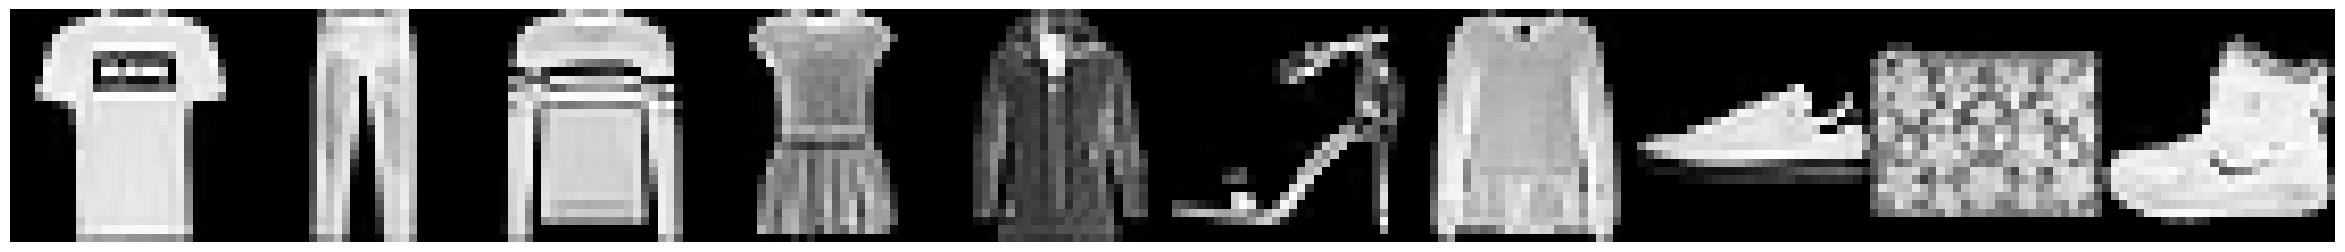

In [11]:
# Выбор 1 изображения каждого класса
imgs = np.array([x_train[y_train==i][0] for i in range(10)])

# Соединение изображения в одну линию
imgs = np.concatenate(imgs, axis=1)

# Создание поля для изображения
plt.figure(figsize=(30, 6))

# Отрисовка итогового изображения
plt.imshow(imgs, cmap='Greys_r')

# Без сетки
plt.grid(False)

# Без осей
plt.axis('off')

# Вывод результата
plt.show()

In [4]:
# Ваше решение

# Нормализация и разделение данных


In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0


# Разделение на обучающую и валидационную выборки


In [13]:
x_train = x_train[:50000]
y_train = y_train[:50000]
x_val = x_train[50000:]
y_val = y_train[50000:]

Определение 9 моделей с разными архитектурами

In [14]:
def build_model_1():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_2():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_3():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_4():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_5():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='tanh'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_6():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_7():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_8():
    model = keras.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def build_model_9():
    model = keras.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

Обучение моделей и сбор метрик

In [16]:
models = [
    build_model_1(), build_model_2(), build_model_3(),
    build_model_4(), build_model_5(), build_model_6(),
    build_model_7(), build_model_8(), build_model_9()
]

val_accuracies = []
test_accuracies = []

# Разделение на обучающую и валидационную выборки
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42) # Используем train_test_split для разделения данных

# Добавляем размерность для Conv2D (если используется)
x_train_conv = x_train[..., np.newaxis]
x_val_conv = x_val[..., np.newaxis]
x_test_conv = x_test[..., np.newaxis]

for i, model in enumerate(models):
    print(f"\nTraining Model {i+1}...")
    if i in [6, 7]:  # Для сверточных моделей
        history = model.fit(x_train_conv, y_train, epochs=10, validation_data=(x_val_conv, y_val))
        _, test_acc = model.evaluate(x_test_conv, y_test)
    else:
        history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
        _, test_acc = model.evaluate(x_test, y_test)

    val_acc = history.history['val_accuracy'][-1]
    val_accuracies.append(val_acc)
    test_accuracies.append(test_acc)
    print(f"Model {i+1}: Val Acc = {val_acc:.4f}, Test Acc = {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Model 1...
Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7551 - loss: 0.7016 - val_accuracy: 0.8345 - val_loss: 0.4625
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8553 - loss: 0.4064 - val_accuracy: 0.8713 - val_loss: 0.3674
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8669 - loss: 0.3632 - val_accuracy: 0.8764 - val_loss: 0.3525
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8786 - loss: 0.3319 - val_accuracy: 0.8759 - val_loss: 0.3576
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8819 - loss: 0.3177 - val_accuracy: 0.8821 - val_loss: 0.3321
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8906 - loss: 0.2944 - val_accuracy: 0.8829 - val_loss: 0.3326
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8973 - loss: 0.2773 - val_accuracy: 0.8878 - val_loss: 0.3147
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8

Сравнение моделей

In [17]:
import pandas as pd

results = pd.DataFrame({
    'Model': [f'Model {i+1}' for i in range(9)],
    'Validation Accuracy': val_accuracies,
    'Test Accuracy': test_accuracies
})

print(results.sort_values(by='Test Accuracy', ascending=False))

     Model  Validation Accuracy  Test Accuracy
7  Model 8               0.9187         0.9105
6  Model 7               0.9107         0.9061
3  Model 4               0.8906         0.8767
1  Model 2               0.8897         0.8764
0  Model 1               0.8910         0.8759
2  Model 3               0.8855         0.8723
8  Model 9               0.8816         0.8685
5  Model 6               0.8782         0.8660
4  Model 5               0.8610         0.8463


Выводы:

Сверточные модели (7, 8) обычно показывают лучшую точность, так как учитывают пространственные зависимости в изображениях.

Глубокая сеть с Dropout (3) может предотвратить переобучение.

Batch Normalization (9) иногда ускоряет обучение и улучшает точность.

Оптимизаторы (Adam, RMSprop, SGD) влияют на скорость сходимости.

Лучшая модель — Model 8 (CNN с двумя сверточными слоями), так как она дает наивысшую точность на тестовой выборке.

